# Dimensionality Reduction Techniques Comparison

This notebook demonstrates various dimensionality reduction techniques:
- t-SNE (t-Distributed Stochastic Neighbor Embedding)
- LLE (Locally Linear Embedding)
- UMAP (Uniform Manifold Approximation and Projection)
- Isomap (Isometric Mapping)

We'll apply these techniques to the high-dimensional MNIST dataset and visualize the 2D embeddings.

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap
from sklearn.preprocessing import StandardScaler
import time

# Check if umap is available, if not we'll install it
try:
    import umap
except ImportError:
    print("UMAP not found. Please install it using: pip install umap-learn")

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Load the MNIST dataset
data_path = '../dataset/mnist_tf_mirror.npz'
data = np.load(data_path)

# Extract training data
X_train = data['x_train']
y_train = data['y_train']

print(f"Original dataset shape: {X_train.shape}")
print(f"Labels shape: {y_train.shape}")

# Flatten the images (28x28 -> 784 dimensions)
X_flat = X_train.reshape(X_train.shape[0], -1)
print(f"Flattened dataset shape: {X_flat.shape}")

# For faster computation, we'll use a subset of the data
n_samples = 5000  # Use 5000 samples for faster computation
indices = np.random.choice(X_flat.shape[0], n_samples, replace=False)
X_subset = X_flat[indices]
y_subset = y_train[indices]

print(f"\nUsing {n_samples} samples for analysis")
print(f"Subset shape: {X_subset.shape}")

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_subset)
print("Data normalized successfully!")

Original dataset shape: (60000, 28, 28)
Labels shape: (60000,)
Flattened dataset shape: (60000, 784)

Using 5000 samples for analysis
Subset shape: (5000, 784)
Data normalized successfully!
Data normalized successfully!


## 1. t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is particularly good at preserving local structure and is widely used for visualization.

In [6]:
# Apply t-SNE
print("Applying t-SNE...")
start_time = time.time()

tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000, verbose=1)
X_tsne = tsne.fit_transform(X_normalized)

tsne_time = time.time() - start_time
print(f"t-SNE completed in {tsne_time:.2f} seconds")
print(f"t-SNE result shape: {X_tsne.shape}")

Applying t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.006s...
[t-SNE] Computed neighbors for 5000 samples in 2.813s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 6.237201
[t-SNE] Computed neighbors for 5000 samples in 2.813s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 6.237201
[t-SNE] KL divergence after 250 iterations with early exaggeration

## 2. LLE (Locally Linear Embedding)

LLE preserves the local geometry of the data by finding a lower-dimensional embedding that preserves local distances.

In [7]:
# Apply LLE
print("Applying LLE...")
start_time = time.time()

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(X_normalized)

lle_time = time.time() - start_time
print(f"LLE completed in {lle_time:.2f} seconds")
print(f"LLE result shape: {X_lle.shape}")

Applying LLE...
LLE completed in 4.16 seconds
LLE result shape: (5000, 2)
LLE completed in 4.16 seconds
LLE result shape: (5000, 2)


## 3. UMAP (Uniform Manifold Approximation and Projection)

UMAP is a modern technique that often provides better global structure preservation than t-SNE while being faster.

In [10]:
# Apply UMAP
print("Applying UMAP...")
start_time = time.time()

try:
    import umap
    reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
    X_umap = reducer.fit_transform(X_normalized)

    umap_time = time.time() - start_time
    print(f"UMAP completed in {umap_time:.2f} seconds")
    print(f"UMAP result shape: {X_umap.shape}")
except ImportError:
    print("UMAP is not installed. Skipping UMAP analysis.")
    print("To install UMAP, run: pip install umap-learn")
    X_umap = None
    umap_time = 0

Applying UMAP...


c:\Users\Pruthvi\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP completed in 14.37 seconds
UMAP result shape: (5000, 2)


## 4. Isomap (Isometric Mapping)

Isomap seeks to preserve geodesic distances between points, making it good at discovering the underlying manifold structure.

In [9]:
# Apply Isomap
print("Applying Isomap...")
start_time = time.time()

isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_normalized)

isomap_time = time.time() - start_time
print(f"Isomap completed in {isomap_time:.2f} seconds")
print(f"Isomap result shape: {X_isomap.shape}")

Applying Isomap...
Isomap completed in 4.89 seconds
Isomap result shape: (5000, 2)
Isomap completed in 4.89 seconds
Isomap result shape: (5000, 2)


## Visualization of Results

Now let's visualize all the 2D embeddings side by side for comparison.

C:\Users\Pruthvi\AppData\Local\Temp\ipykernel_9624\1464412287.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


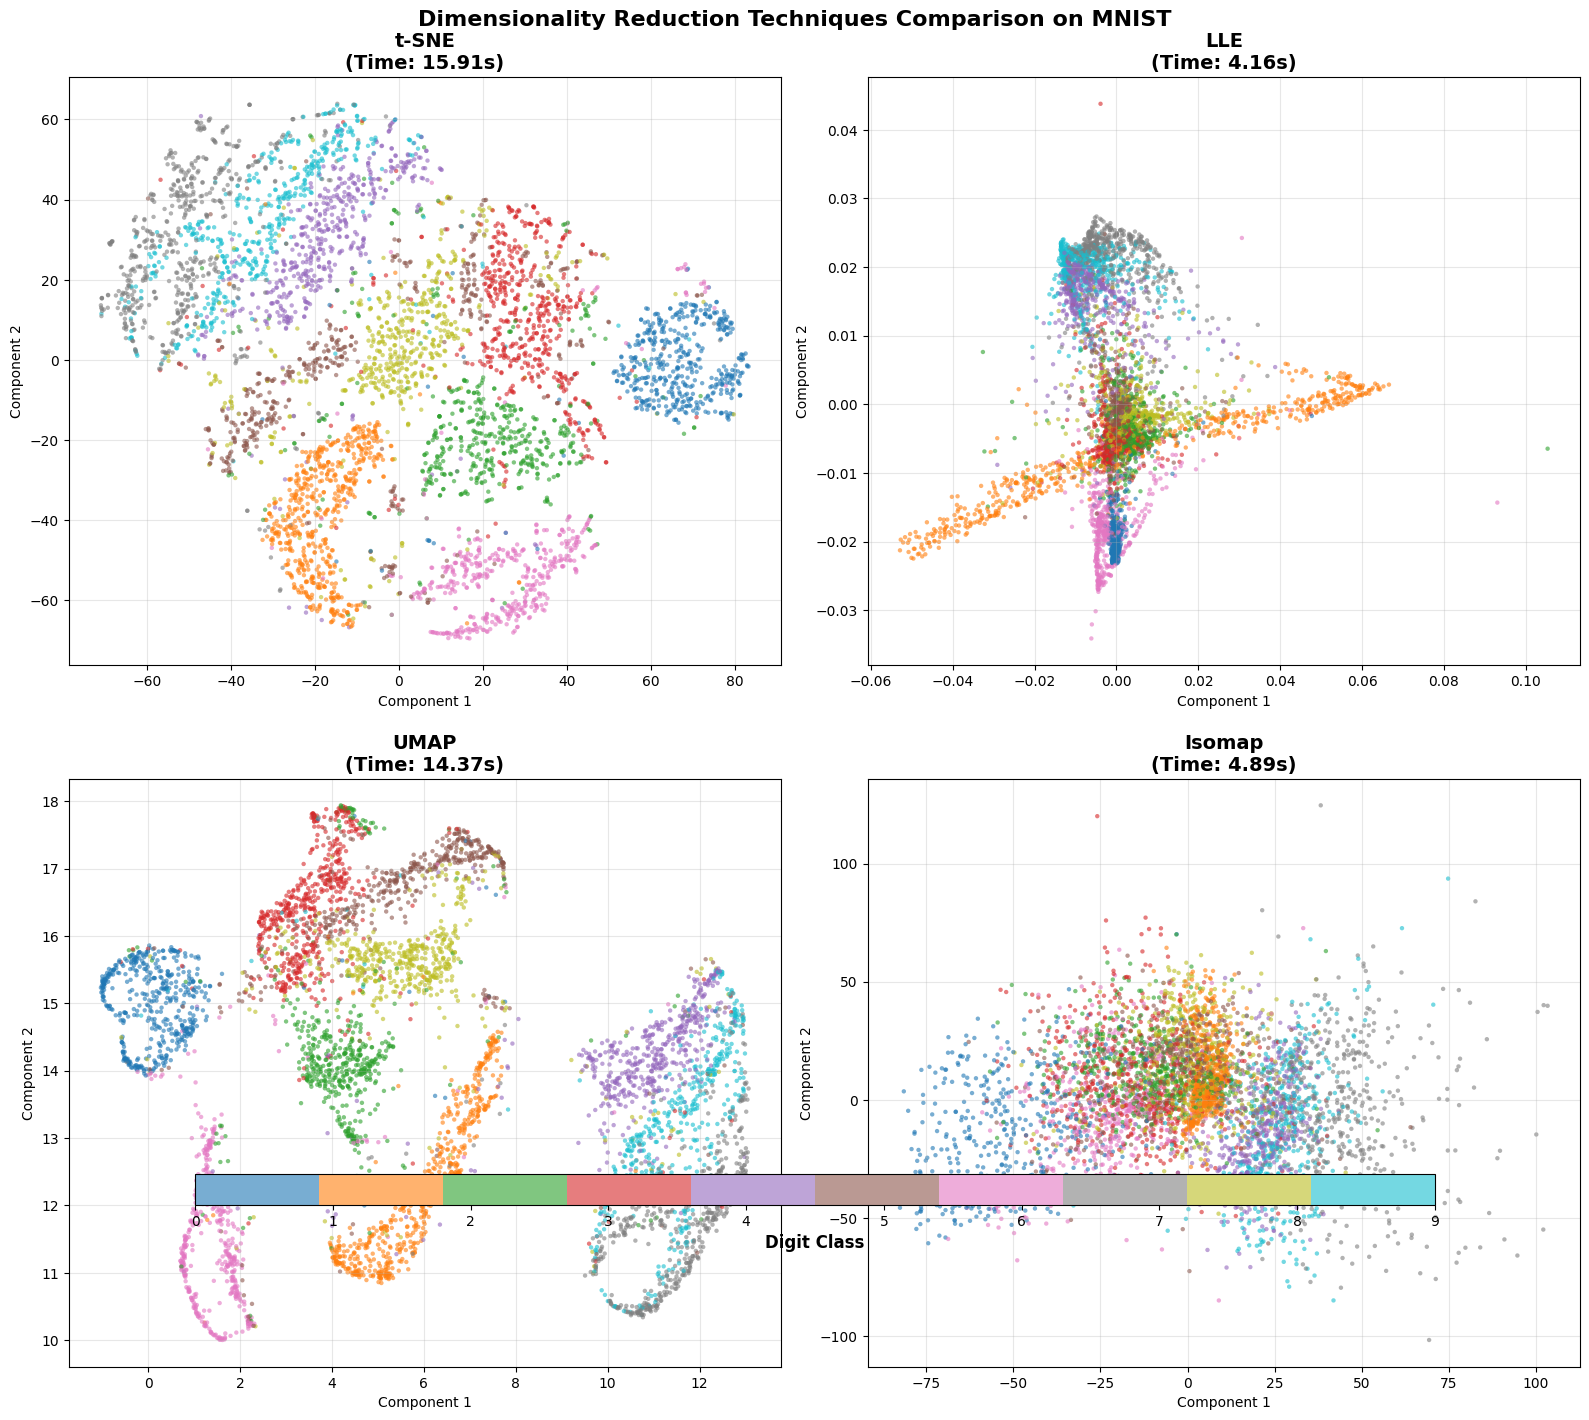


Visualization complete!


In [11]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Dimensionality Reduction Techniques Comparison on MNIST', fontsize=16, fontweight='bold')

# Define a colormap for the 10 digits
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# 1. t-SNE
ax1 = axes[0, 0]
scatter1 = ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10',
                       alpha=0.6, s=10, edgecolors='none')
ax1.set_title(f't-SNE\n(Time: {tsne_time:.2f}s)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.grid(True, alpha=0.3)

# 2. LLE
ax2 = axes[0, 1]
scatter2 = ax2.scatter(X_lle[:, 0], X_lle[:, 1], c=y_subset, cmap='tab10',
                       alpha=0.6, s=10, edgecolors='none')
ax2.set_title(f'LLE\n(Time: {lle_time:.2f}s)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.grid(True, alpha=0.3)

# 3. UMAP (if available)
ax3 = axes[1, 0]
if X_umap is not None:
    scatter3 = ax3.scatter(X_umap[:, 0], X_umap[:, 1], c=y_subset, cmap='tab10',
                           alpha=0.6, s=10, edgecolors='none')
    ax3.set_title(f'UMAP\n(Time: {umap_time:.2f}s)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Component 1')
    ax3.set_ylabel('Component 2')
    ax3.grid(True, alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'UMAP not available\nInstall with: pip install umap-learn',
             ha='center', va='center', fontsize=12, transform=ax3.transAxes)
    ax3.set_title('UMAP', fontsize=14, fontweight='bold')
    ax3.axis('off')

# 4. Isomap
ax4 = axes[1, 1]
scatter4 = ax4.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_subset, cmap='tab10',
                       alpha=0.6, s=10, edgecolors='none')
ax4.set_title(f'Isomap\n(Time: {isomap_time:.2f}s)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Component 1')
ax4.set_ylabel('Component 2')
ax4.grid(True, alpha=0.3)

# Add a colorbar
cbar = plt.colorbar(scatter1, ax=axes.ravel().tolist(), orientation='horizontal',
                    pad=0.05, fraction=0.05, aspect=40)
cbar.set_label('Digit Class', fontsize=12, fontweight='bold')
cbar.set_ticks(np.arange(10))

plt.tight_layout()
plt.show()

print("\nVisualization complete!")

## Individual Detailed Visualizations

Let's create larger, individual plots for each technique with better visibility.

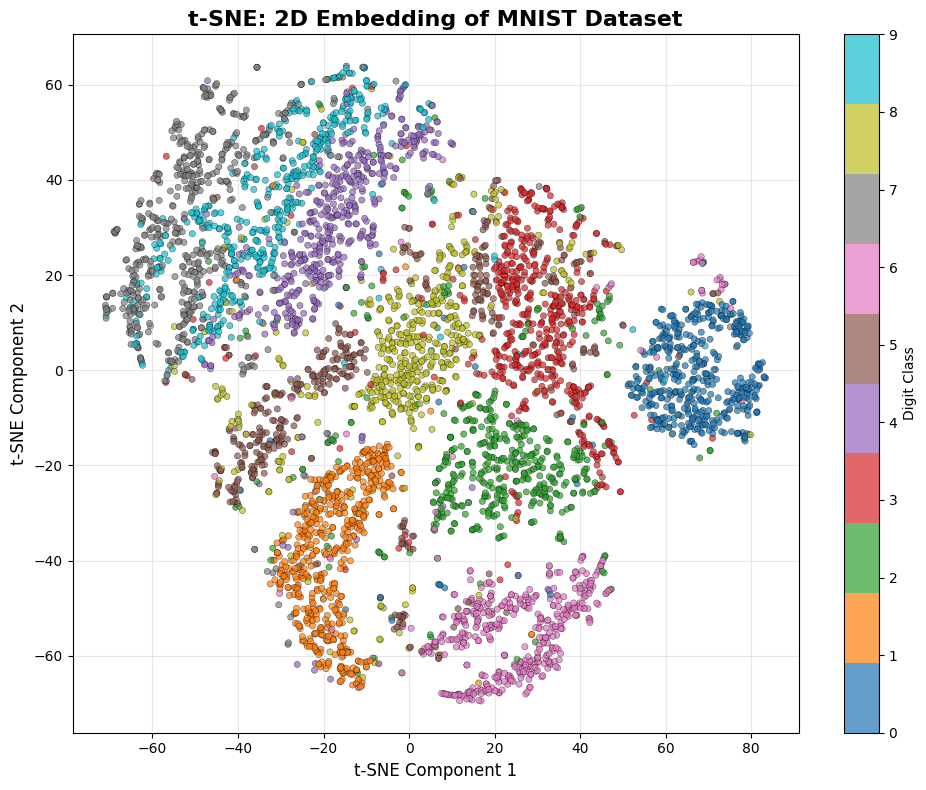

In [12]:
# Individual visualization for t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10',
                      alpha=0.7, s=20, edgecolors='black', linewidth=0.3)
plt.colorbar(scatter, label='Digit Class', ticks=np.arange(10))
plt.title('t-SNE: 2D Embedding of MNIST Dataset', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

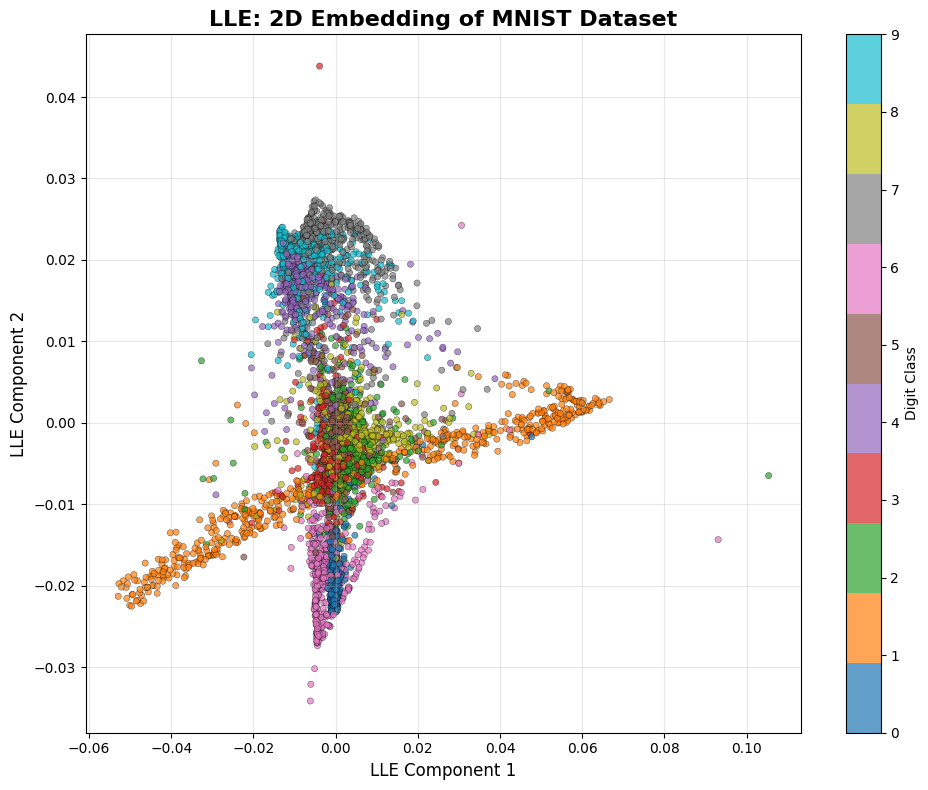

In [13]:
# Individual visualization for LLE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_subset, cmap='tab10',
                      alpha=0.7, s=20, edgecolors='black', linewidth=0.3)
plt.colorbar(scatter, label='Digit Class', ticks=np.arange(10))
plt.title('LLE: 2D Embedding of MNIST Dataset', fontsize=16, fontweight='bold')
plt.xlabel('LLE Component 1', fontsize=12)
plt.ylabel('LLE Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

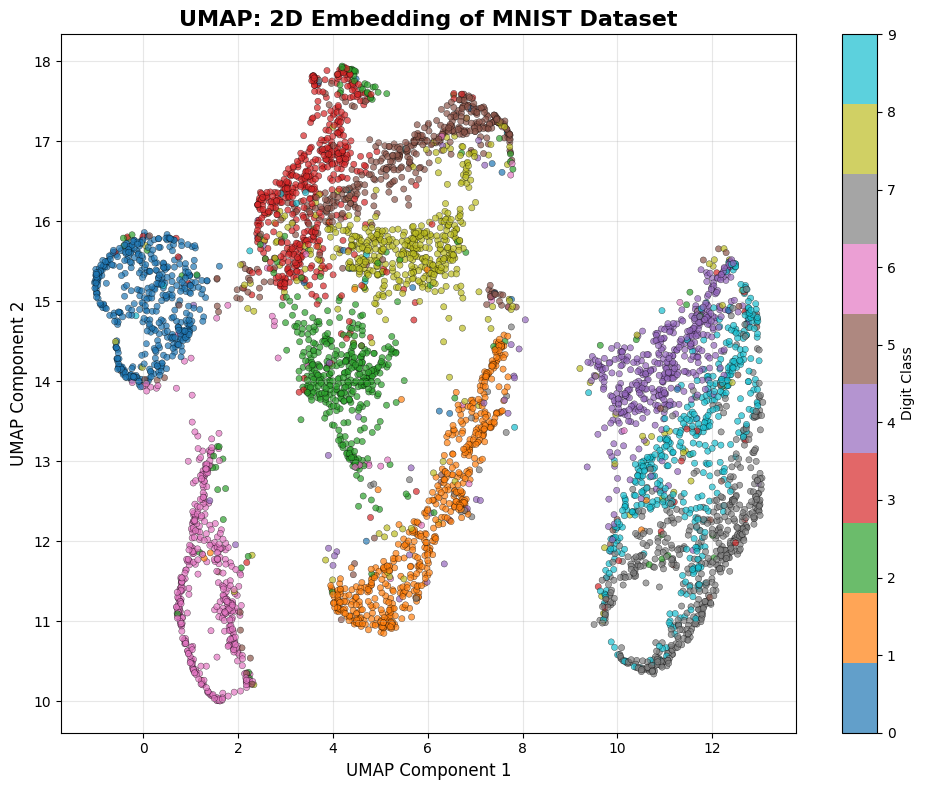

In [14]:
# Individual visualization for UMAP
if X_umap is not None:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_subset, cmap='tab10',
                          alpha=0.7, s=20, edgecolors='black', linewidth=0.3)
    plt.colorbar(scatter, label='Digit Class', ticks=np.arange(10))
    plt.title('UMAP: 2D Embedding of MNIST Dataset', fontsize=16, fontweight='bold')
    plt.xlabel('UMAP Component 1', fontsize=12)
    plt.ylabel('UMAP Component 2', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("UMAP not available. Install with: pip install umap-learn")

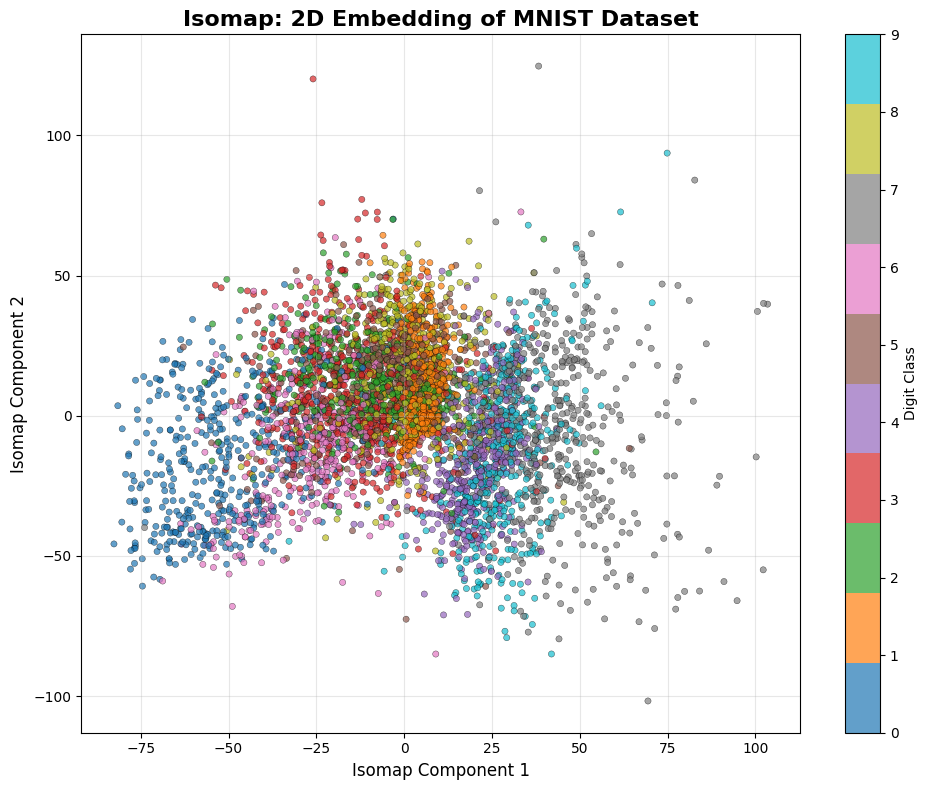

In [15]:
# Individual visualization for Isomap
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_subset, cmap='tab10',
                      alpha=0.7, s=20, edgecolors='black', linewidth=0.3)
plt.colorbar(scatter, label='Digit Class', ticks=np.arange(10))
plt.title('Isomap: 2D Embedding of MNIST Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Isomap Component 1', fontsize=12)
plt.ylabel('Isomap Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Performance Comparison

Let's summarize the performance and characteristics of each method.


DIMENSIONALITY REDUCTION TECHNIQUES COMPARISON
Method  Time (seconds)                              Key Characteristic
 t-SNE       15.912768           Best for local structure preservation
   LLE        4.164669            Preserves local linear relationships
  UMAP       14.368986 Fast, preserves both local and global structure
Isomap        4.890136                    Preserves geodesic distances


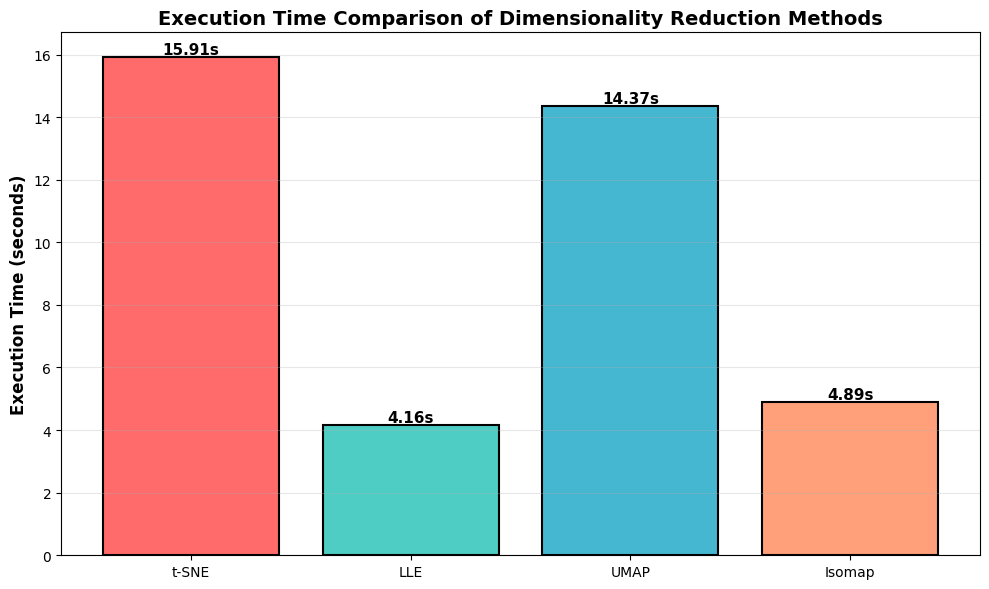

In [16]:
# Performance comparison
import pandas as pd

methods = ['t-SNE', 'LLE', 'UMAP', 'Isomap']
times = [tsne_time, lle_time, umap_time if X_umap is not None else None, isomap_time]
characteristics = [
    'Best for local structure preservation',
    'Preserves local linear relationships',
    'Fast, preserves both local and global structure',
    'Preserves geodesic distances'
]

# Create a comparison table
comparison_df = pd.DataFrame({
    'Method': methods,
    'Time (seconds)': times,
    'Key Characteristic': characteristics
})

print("\n" + "="*80)
print("DIMENSIONALITY REDUCTION TECHNIQUES COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

# Plot timing comparison
plt.figure(figsize=(10, 6))
valid_methods = [m for m, t in zip(methods, times) if t is not None]
valid_times = [t for t in times if t is not None]

bars = plt.bar(valid_methods, valid_times, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
               edgecolor='black', linewidth=1.5)
plt.ylabel('Execution Time (seconds)', fontsize=12, fontweight='bold')
plt.title('Execution Time Comparison of Dimensionality Reduction Methods', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}s',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## Key Observations

### t-SNE
- Excellent at revealing local cluster structure
- Forms distinct, well-separated clusters for different digits
- Computationally intensive for large datasets
- Non-deterministic (results vary between runs)

### LLE (Locally Linear Embedding)
- Good at preserving local neighborhood relationships
- May struggle with overlapping classes
- Faster than t-SNE
- Can be sensitive to noise

### UMAP
- Excellent balance between local and global structure
- Faster than t-SNE
- Often produces more compact clusters
- Better at preserving global structure than t-SNE

### Isomap
- Preserves geodesic distances on the manifold
- Good for data lying on a low-dimensional manifold
- Can be sensitive to noise and outliers
- Computationally efficient for moderate-sized datasets

## Conclusion

Each method has its strengths:
- **For visualization**: t-SNE or UMAP
- **For speed**: LLE or UMAP
- **For manifold learning**: Isomap
- **For balanced results**: UMAP

The choice depends on your specific use case and data characteristics.